In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movie = pd.read_csv('./tmdb-movies.csv')

In [4]:
movie.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
movie.shape

(10866, 21)

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
movie['budget_adj'] = movie['budget_adj'].astype('int64') 
movie['revenue_adj'] = movie['revenue_adj'].astype('int64') 

In [9]:
movie.dropna(inplace = True)
movie.drop_duplicates(inplace = True)

In [10]:
#deleted columns 
deleted_columns = [ 'id', 'budget', 'revenue','original_title', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies', 'release_date']
#drop it from our data
movie.drop(deleted_columns,axis = 1, inplace = True)

In [11]:
movie.shape

(1992, 11)

In [12]:
#questions
#1 Top 5 movie vote average score?
#2 top 10 films by revenue
#3 releationship between popularity and budget
#4 releationship between revenue and budget
#5 group_by director, popular
#6 group_by release_year, which movie is the most popular

In [13]:
#1 Top 5 movie vote average score?

In [14]:
movie.sort_values('vote_average', ascending = False).head(7)

,imdb_id,popularity,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
7269,tt0068646,5.738034,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,3970,8.3,1972,31287365,1277913732
650,tt2582802,4.780419,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105,Drama|Music,2372,8.2,2014,3039600,12888912
3826,tt6019206,0.146477,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,247,Crime|Action,28,8.1,2011,29081941,0
2875,tt0468569,8.466668,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,8432,8.1,2008,187365527,1014733032
2409,tt0137523,8.947905,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139,Drama,5923,8.1,1999,82470329,132022892
2389,tt1621444,0.052322,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...,Richard Press,84,Documentary,16,8.1,2010,0,1339650
10222,tt0108052,2.377288,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,Steven Spielberg,195,Drama|History|War,2632,8.1,1993,33208339,484941026


In [15]:
#2 top 10 films by revenue

In [16]:
movie['profit'] = movie['revenue_adj'] - movie['budget_adj']
movie.sort_values('profit', ascending = False). head(10)

,imdb_id,popularity,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,tt0076759,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,4428,7.9,1977,39575591,2789712242,2750136651
1386,tt0499549,9.432768,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,240886902,2827123750,2586236848
5231,tt0120338,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,4654,7.3,1997,271692064,2506405735,2234713671
10594,tt0070047,2.010733,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,1113,7.2,1973,39289276,2167324901,2128035625
9806,tt0073195,2.563191,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,1415,7.3,1975,28362748,1907005841,1878643093
8889,tt0083866,2.900556,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,1830,7.2,1982,23726245,1791694309,1767968064
3,tt2488496,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919,1902723129,1718723210
7309,tt0080684,5.488441,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,124,Adventure|Action|Science Fiction,3954,8.0,1980,47628661,1424626187,1376997526
10223,tt0107290,2.204926,Sam Neill|Laura Dern|Jeff Goldblum|Richard Att...,Steven Spielberg,127,Adventure|Science Fiction,3169,7.4,1993,95096607,1388863311,1293766704
0,tt0369610,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445892,1254445953


In [17]:
#3 releationship between popularity and budget

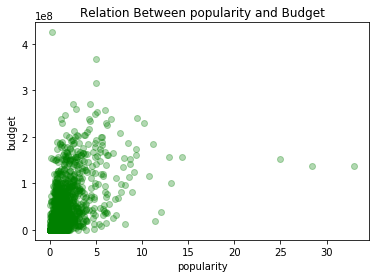

In [18]:
plt.title("Relation Between popularity and Budget")
plt.xlabel("popularity")
plt.ylabel("budget")
plt.scatter(movie["popularity"],movie["budget_adj"], alpha=0.3,color = "g")
plt.show()

In [19]:
#4 releationship between revenue and budget

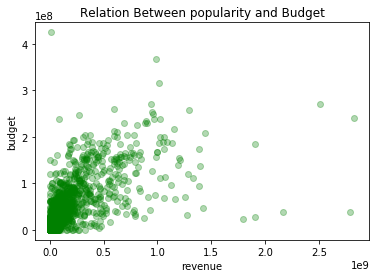

In [20]:
plt.title("Relation Between popularity and Budget")
plt.xlabel("revenue")
plt.ylabel("budget")
plt.scatter(movie["revenue_adj"],movie["budget_adj"], alpha=0.3,color = "g")
plt.show()

In [21]:
#5 group_by director, popular

In [22]:
movie.groupby('director').mean().sort_values(['popularity'],ascending=False).head(10)

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
director,,,,,,,,
Colin Trevorrow,32.985763,124.000000,5562.000000,6.500000,2015.000000,1.379999e+08,1.392446e+09,1.254446e+09
George Miller,14.675428,110.000000,3208.500000,6.450000,2013.000000,1.320108e+08,2.469825e+08,1.149717e+08
Joe Russo|Anthony Russo,12.971027,136.000000,3848.000000,7.600000,2014.000000,1.565855e+08,6.583651e+08,5.017796e+08
Chad Stahelski|David Leitch,11.422751,101.000000,2712.000000,7.000000,2014.000000,1.842182e+07,7.252661e+07,5.410479e+07
Don Hall|Chris Williams,8.691294,102.000000,4185.000000,7.800000,2014.000000,1.519800e+08,6.006485e+08,4.486685e+08
Christopher Nolan,8.635610,145.285714,5856.714286,7.785714,2007.857143,1.369899e+08,5.752014e+08,4.382115e+08
Morten Tyldum,8.110711,113.000000,3478.000000,8.000000,2014.000000,1.289527e+07,2.151261e+08,2.022308e+08
Lilly Wachowski|Lana Wachowski,7.753899,136.000000,6351.000000,7.800000,1999.000000,8.247033e+07,6.067687e+08,5.242984e+08
Kyle Balda|Pierre Coffin,7.404165,91.000000,2893.000000,6.500000,2015.000000,6.807997e+07,1.064192e+09,9.961120e+08


In [23]:
#6 group_by release_year, which movie is the most popular

In [24]:
movie.groupby('release_year').mean().sort_values(['popularity'],ascending=False).head(10)

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
release_year,,,,,,,
1972,5.738034,175.000000,3970.000000,8.300000,3.128736e+07,1.277914e+09,1.246626e+09
1977,5.109968,106.666667,1594.000000,7.066667,2.998151e+07,1.152293e+09,1.122312e+09
1962,3.170651,110.000000,560.000000,6.700000,7.929293e+06,4.296236e+08,4.216943e+08
1982,3.157184,113.666667,1579.000000,7.466667,3.653089e+07,6.322947e+08,5.957638e+08
1980,3.073811,106.500000,2041.000000,7.100000,2.513735e+07,7.405971e+08,7.154597e+08
1963,2.508235,115.000000,458.000000,6.700000,1.780045e+07,5.617734e+08,5.439729e+08
2015,2.406612,104.624242,785.527273,6.184848,3.094968e+07,1.248976e+08,9.394788e+07
1984,2.204473,110.200000,1189.600000,6.740000,3.627145e+07,3.086969e+08,2.724254e+08
1999,2.092869,124.416667,1243.833333,6.795833,6.130867e+07,2.713672e+08,2.100585e+08
